In [1]:
%load_ext autoreload
%autoreload 2

import transformer_lens

from lexical_reflections.utils.device import DEVICE

mgpt = transformer_lens.HookedTransformer.from_pretrained("ai-forever/mGPT", device=DEVICE)

Loaded pretrained model ai-forever/mGPT into HookedTransformer


In [2]:
import json

toy_data = None
with open("../../data/toy_data.json") as f:
    toy_data = json.load(f)

Data len:  11
Language hidden space shape:  (24, 16, 2048)


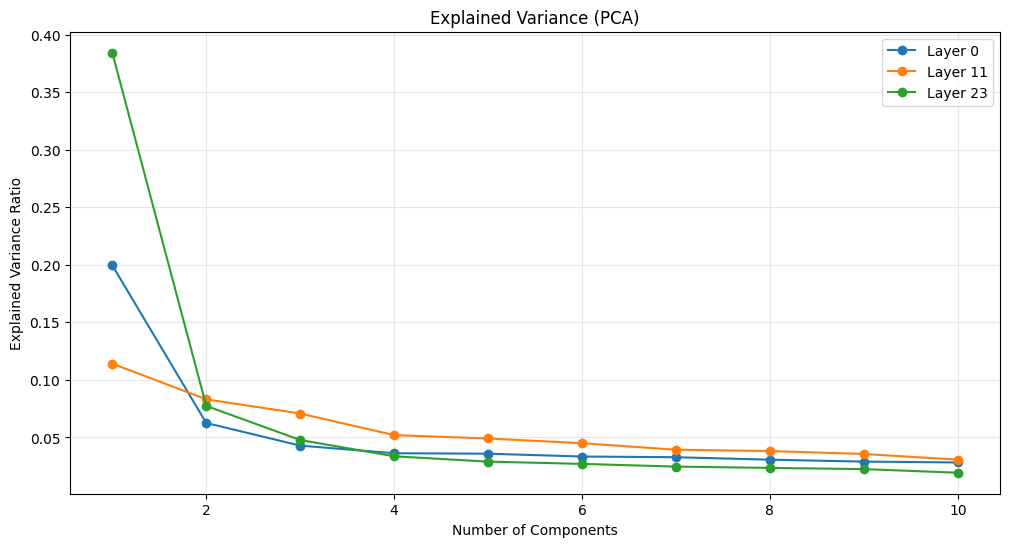

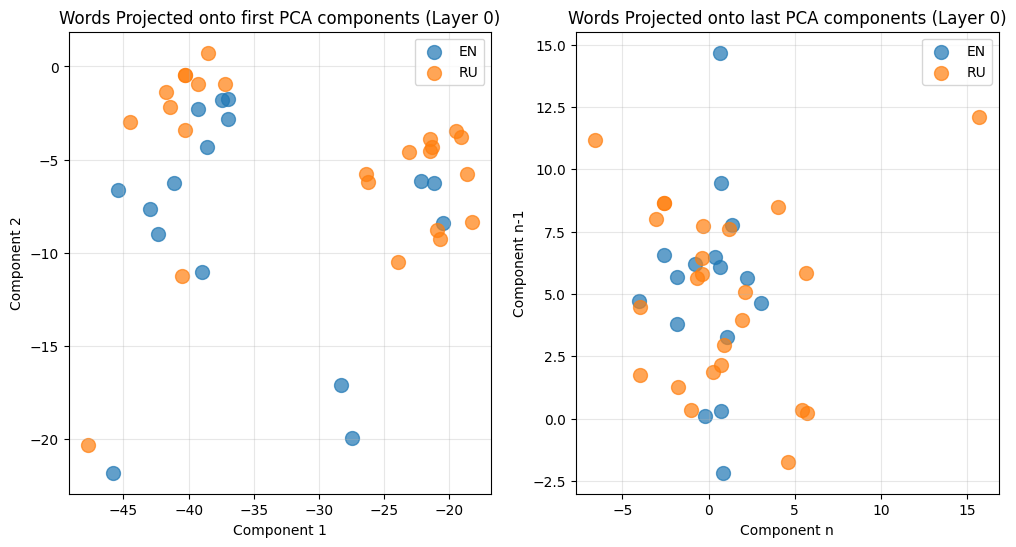

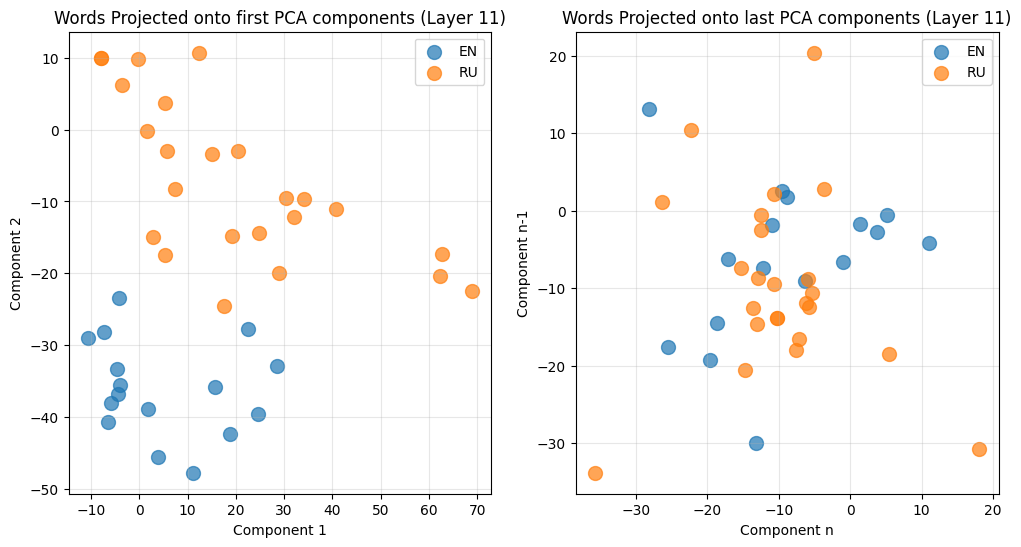

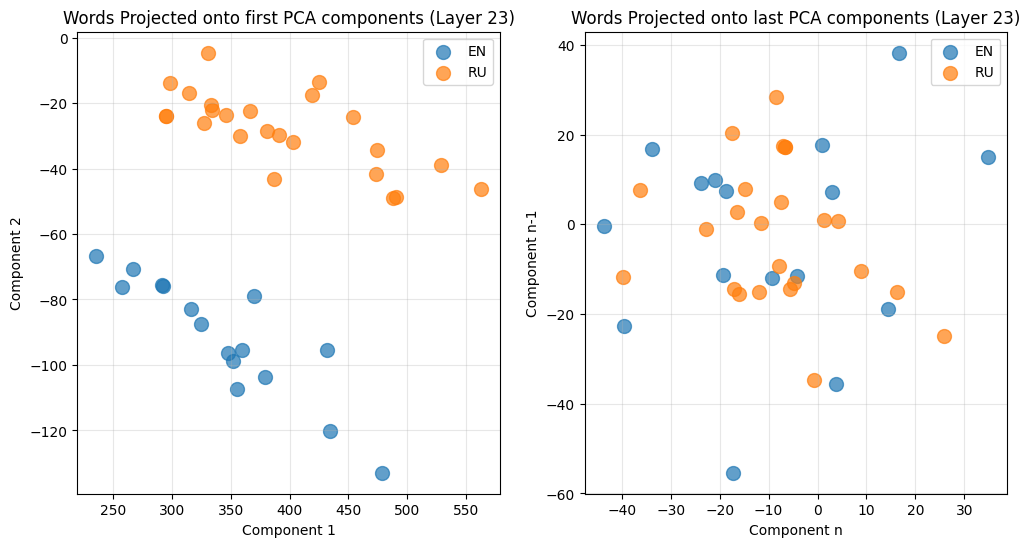

In [4]:
from lexical_reflections.pca.analyze import find_lexical_subspace_intersection

find_lexical_subspace_intersection(mgpt, toy_data)